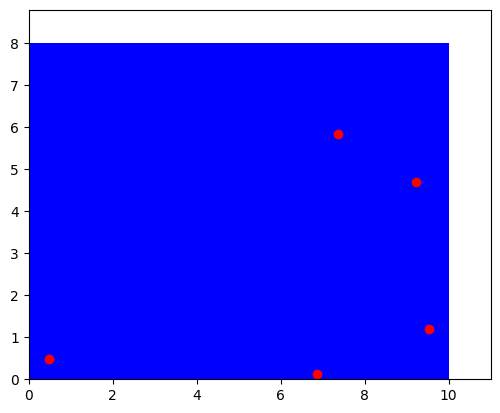

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

class Escena:
    def __init__(self, width, height, color, n_points):
        # Inicializa la escena con dimensiones, color de fondo y puntos generados aleatoriamente.
        self.width = width
        self.height = height
        self.color = color
        self.n_points = n_points
        self.points = np.column_stack((
            np.random.uniform(0, width, n_points),
            np.random.uniform(0, height, n_points)
        ))

    def dibujar(self):
        # Dibuja la escena estática con el fondo y los puntos.
        fig, ax = plt.subplots()
        rect = patches.Rectangle((0, 0), self.width, self.height, facecolor=self.color)
        ax.add_patch(rect)
        ax.scatter(self.points[:, 0], self.points[:, 1], c='red')
        ax.set_xlim(0, self.width * 1.1)
        ax.set_ylim(0, self.height * 1.1)
        ax.set_aspect('equal')
        plt.show()

    def animar(self, velocidad, frames=50, interval=100):
        # Crea la animación en la que los puntos se mueven a la derecha y el fondo cambia de color.
        fig, ax = plt.subplots()
        rect = patches.Rectangle((0, 0), self.width, self.height, facecolor=self.color)
        ax.add_patch(rect)
        scatter = ax.scatter(self.points[:, 0], self.points[:, 1], c='black')
        ax.set_xlim(0, self.width * 1.1)
        ax.set_ylim(0, self.height * 1.1)
        ax.set_aspect('equal')

        def update(frame):
            # Mueve los puntos hacia la derecha sumando 'velocidad' al eje x.
            self.points[:, 0] += velocidad

            # Verifica si algún punto ha salido de los límites (eje x > self.width)
            mask = self.points[:, 0] > self.width
            if np.any(mask):
                num_extras = np.count_nonzero(mask)
                # Reemplaza los puntos que salen generando nuevas posiciones aleatorias dentro del cuadro.
                self.points[mask, 0] = np.random.uniform(0, self.width, num_extras)
                self.points[mask, 1] = np.random.uniform(0, self.height, num_extras)

            scatter.set_offsets(self.points)
            # Cambia el color del fondo usando un colormap (en este caso 'hsv')
            nuevo_color = plt.cm.hsv(frame / frames)
            rect.set_facecolor(nuevo_color)
            return scatter, rect

        anim = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
        plt.close(fig)  # Evita mostrar la figura estática
        return anim

# Ejemplo de uso en un cuaderno Jupyter:
escena = Escena(width=10, height=8, color='blue', n_points=5)
escena.dibujar()  # Muestra la escena inicial

# Crea una animación donde los puntos se desplazan 0.2 unidades a la derecha en cada frame
# y se regeneran aleatoriamente cuando salen del cuadro.
animacion = escena.animar(velocidad=0.2, frames=50, interval=200)

from IPython.display import HTML
HTML(animacion.to_jshtml())
